# Part I - (Ford GoBike Data Visusalization)
## by (Joe Solomon Obusor)

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Loading the Dataset


In [2]:
df = pd.read_csv('Dataset/201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### Performing Exploratory data Analysis

In [3]:
# Data structure
df.shape

(183412, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
# Checking for null values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
# Checking the data types of the features
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [7]:
# Creating Column for duration in hours
df['duration_hour'] = df['duration_sec']/ 3600
#df.drop('duration_sec', axis=1, inplace=True)

In [8]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_hour
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,14.495833
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,11.811389
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,17.181667
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,10.136111
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,0.440278


In [9]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
duration_hour              float64
dtype: object

In [10]:
# Creating a new column 'start_time_year'
df['start_time_year'] = pd.to_datetime(df['start_time']).dt.year
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_hour,start_time_year
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,14.495833,2019
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,11.811389,2019
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,17.181667,2019
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,10.136111,2019
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,0.440278,2019


### Creating new columns 'start_date' and 'end_date'

In [11]:
df['start_date'] = pd.to_datetime(df['start_time']).dt.day
df['end_date'] = pd.to_datetime(df['end_time']).dt.day

In [12]:
# Coverting the data features to the correct datatypes
df['member_age'] =  df['start_time_year'] - df['member_birth_year']
#df['member_age'] = df['member_age'].astype(int)
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_hour,start_time_year,start_date,end_date,member_age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,14.495833,2019,28,1,35.0
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,2535,Customer,NaN,NaN,No,11.811389,2019,28,1,NaN
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,17.181667,2019,28,1,47.0
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,10.136111,2019,28,1,30.0
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,0.440278,2019,28,1,45.0


### Checking for missing values

In [13]:
print(df.isnull().sum())
print(df.shape)

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
duration_hour                 0
start_time_year               0
start_date                    0
end_date                      0
member_age                 8265
dtype: int64
(183412, 21)


In [14]:
# Dropping the null values
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
duration_hour              0
start_time_year            0
start_date                 0
end_date                   0
member_age                 0
dtype: int64

In [16]:
df.shape

(174952, 21)

### Converting columns to the correct data type

In [17]:
df['bike_share_for_all_trip'] = df['bike_share_for_all_trip'].astype('category')
df['member_gender'] = df['member_gender'].astype('category')
df['user_type'] = df['user_type'].astype('category')
df['bike_id'] = df.bike_id.astype(str)
print(df['bike_share_for_all_trip'].dtype)
print(df['member_gender'].dtype)
print(df['user_type'].dtype)
print(df['bike_share_for_all_trip'].unique())
print(df.user_type.unique())
print(df.member_gender.unique())


category
category
category
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
['Customer', 'Subscriber']
Categories (2, object): ['Customer', 'Subscriber']
['Male', 'Other', 'Female']
Categories (3, object): ['Female', 'Male', 'Other']


In [18]:
df.dtypes

duration_sec                  int64
start_time                   object
end_time                     object
start_station_id            float64
start_station_name           object
start_station_latitude      float64
start_station_longitude     float64
end_station_id              float64
end_station_name             object
end_station_latitude        float64
end_station_longitude       float64
bike_id                      object
user_type                  category
member_birth_year           float64
member_gender              category
bike_share_for_all_trip    category
duration_hour               float64
start_time_year               int64
start_date                    int64
end_date                      int64
member_age                  float64
dtype: object

In [19]:
list(df.columns)

['duration_sec',
 'start_time',
 'end_time',
 'start_station_id',
 'start_station_name',
 'start_station_latitude',
 'start_station_longitude',
 'end_station_id',
 'end_station_name',
 'end_station_latitude',
 'end_station_longitude',
 'bike_id',
 'user_type',
 'member_birth_year',
 'member_gender',
 'bike_share_for_all_trip',
 'duration_hour',
 'start_time_year',
 'start_date',
 'end_date',
 'member_age']

### Dropping Columns that are less important

In [20]:
df.drop(['duration_sec', 'start_time_year', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'start_station_id', 'end_station_id'], axis=1, inplace=True)

In [21]:
df.shape

(174952, 13)

### Converting to datetime datatype

In [22]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [23]:
df.dtypes

start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_name                 object
end_station_name                   object
bike_id                            object
user_type                        category
member_birth_year                 float64
member_gender                    category
bike_share_for_all_trip          category
duration_hour                     float64
start_date                          int64
end_date                            int64
member_age                        float64
dtype: object

### Creating new columns

In [24]:
df['start_day'] = df['start_time'].dt.day_name()
df['end_day'] = df['end_time'].dt.day_name()

In [25]:
df.head()

,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_hour,start_date,end_date,member_age,start_day,end_day
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,14.495833,28,1,35.0,Thursday,Friday
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,17.181667,28,1,47.0,Thursday,Friday
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,10.136111,28,1,30.0,Thursday,Friday
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,0.440278,28,1,45.0,Thursday,Friday
5,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959.0,Male,No,0.498056,28,1,60.0,Thursday,Friday


In [26]:
df['starting_time'] = df['start_time'].dt.strftime('%H:%M')
df['ending_time'] = df['end_time'].dt.strftime('%H:%M')
df.head().T

,0,2,3,4,5
start_time,2019-02-28 17:32:10.145000,2019-02-28 12:13:13.218000,2019-02-28 17:54:26.010000,2019-02-28 23:54:18.549000,2019-02-28 23:49:58.632000
end_time,2019-03-01 08:01:55.975000,2019-03-01 05:24:08.146000,2019-03-01 04:02:36.842000,2019-03-01 00:20:44.074000,2019-03-01 00:19:51.760000
start_station_name,Montgomery St BART Station (Market St at 2nd St),Market St at Dolores St,Grove St at Masonic Ave,Frank H Ogawa Plaza,4th St at Mission Bay Blvd S
end_station_name,Commercial St at Montgomery St,Powell St BART Station (Market St at 4th St),Central Ave at Fell St,10th Ave at E 15th St,Broadway at Kearny
bike_id,4902,5905,6638,4898,5200
user_type,Customer,Customer,Subscriber,Subscriber,Subscriber
member_birth_year,1984.0,1972.0,1989.0,1974.0,1959.0
member_gender,Male,Male,Other,Male,Male
bike_share_for_all_trip,No,No,No,Yes,No
duration_hour,14.495833,17.181667,10.136111,0.440278,0.498056


In [27]:
df.isnull().sum()

start_time                 0
end_time                   0
start_station_name         0
end_station_name           0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
duration_hour              0
start_date                 0
end_date                   0
member_age                 0
start_day                  0
end_day                    0
starting_time              0
ending_time                0
dtype: int64

In [28]:
# Dropping the missing/null values
df.dropna(inplace=True)

In [29]:
df.isnull().sum()

start_time                 0
end_time                   0
start_station_name         0
end_station_name           0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
duration_hour              0
start_date                 0
end_date                   0
member_age                 0
start_day                  0
end_day                    0
starting_time              0
ending_time                0
dtype: int64

In [30]:
df.shape

(174952, 17)

In [31]:
# Saving the cleaned dataset
df.to_csv('fordbike_clean.csv', index=False)


### What is the structure of your dataset?
> There are 174,952 records and 16 features in the dataset

### What is/are the main feature(s) of interest in your dataset?

> User type, Gender type and Age

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Duration (in hours), Start day, End day 

## Univariate Exploration

In [32]:
# Descriptive Analysis
df.describe()

,member_birth_year,duration_hour,start_date,end_date,member_age
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,1984.803135,0.195556,15.312337,15.311714,34.196865
std,10.118731,0.456168,8.033926,8.034127,10.118731
min,1878.000000,0.016944,1.000000,1.000000,18.000000
25%,1980.000000,0.089722,8.000000,8.000000,27.000000
50%,1987.000000,0.141667,15.000000,15.000000,32.000000
75%,1992.000000,0.219167,22.000000,22.000000,39.000000
max,2001.000000,23.485556,28.000000,28.000000,141.000000


### What is the Age Distribution of the riders?

Text(0, 0.5, 'Frequency')

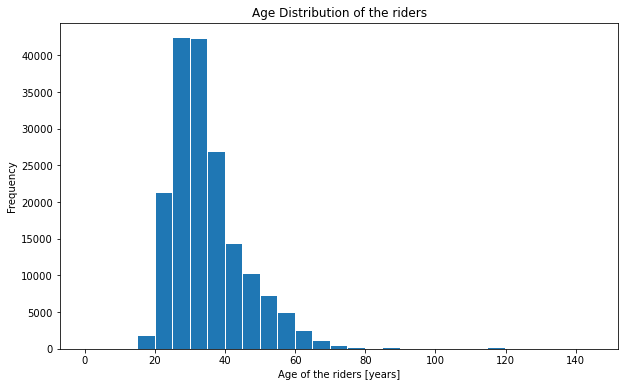

In [33]:
# Calculating the Age Distribution of the Riders
plt.figure(figsize=(10,6))
bins = np.arange(0, df.member_age.max()+5, 5)
plt.hist(df.member_age, bins=bins, rwidth=0.95);
plt.title('Age Distribution of the riders')
plt.xlabel('Age of the riders [years]')
plt.ylabel('Frequency')

### Observation
- Over 80,000 of the Riders are within 30 years age range
- About five thousand of the riders are well above 60 years
- Less than 3,000 of the riders are below 20 years

### What is the distribution of the users?

In [34]:
user_type = df.user_type.value_counts(normalize=True)
user_type

Subscriber    0.905311
Customer      0.094689
Name: user_type, dtype: float64

In [35]:
# Writing a function for plotting the categorical plots

def count_plot(df, x_var, hue=None, color=0, palette=None, order=None, hue_order=None):
    # setting plotting dimensions
    plt.figure(figsize=(10, 5))
    # Plotting parameters
    sns.countplot(data=df, x=x_var, hue=hue, color=sns.color_palette()[color], palette=palette, order=order,edgecolor='black', linewidth=2, hue_order=hue_order)
    # Add title and format
    plt.title(f'''Distribution of {x_var} {'by' if hue else ''}'''.title(), fontsize=14, weight= 'bold')
    # x label and formatting
    plt.xlabel(x_var.title(), fontsize=10, weight= "bold")
    # y label and formatting
    plt.ylabel('Frequency'.title(), fontsize=10, weight='bold')

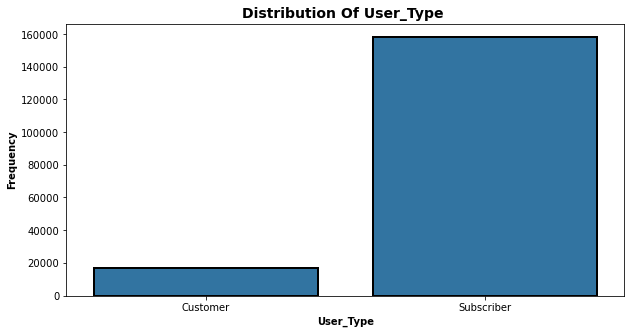

In [36]:
# For the User type distribution
count_plot(df, 'user_type')

### Observation
- Over 90% of the riders are subscribers while a handful are customers

### What day recorded highest ride?

In [37]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Saturday']

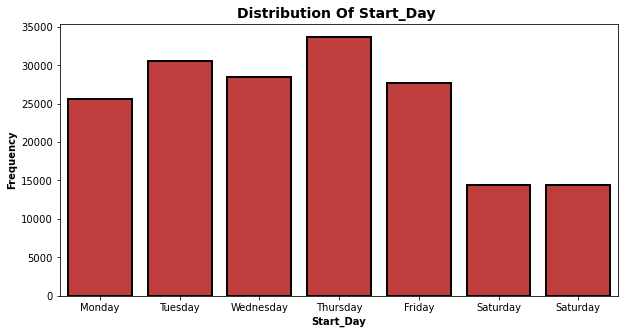

In [38]:
count_plot(df, 'start_day', order=day_order, color=3)

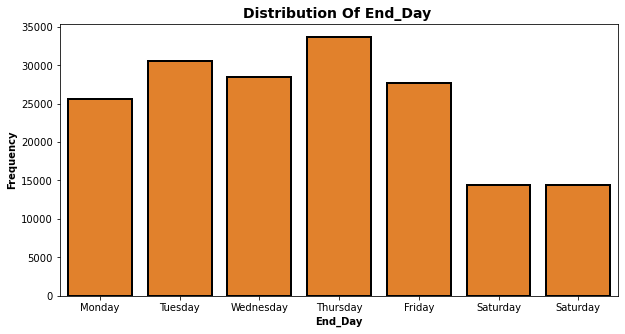

In [39]:
# For End day
count_plot(df, 'end_day', order=day_order, color=1)

### Observation
- Thursday recorded the highest number of trips/rides per day

### What gender dominated the bike trip?

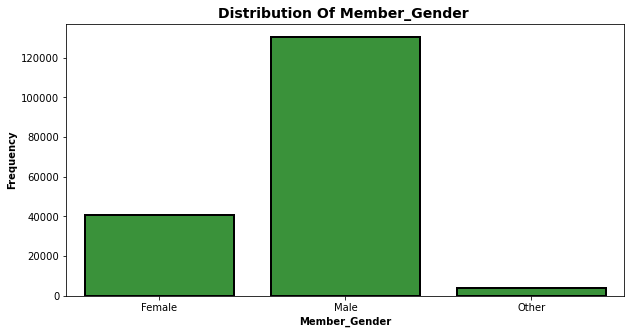

In [40]:
count_plot(df, 'member_gender', color=2)

  ### Observation
 The Ride was dominated majorly by the male gender with about 75% 

### What is the Average age of the riders with respect to gender?

Text(0.5, 1.0, 'Average Age of the Riders according to Gender')

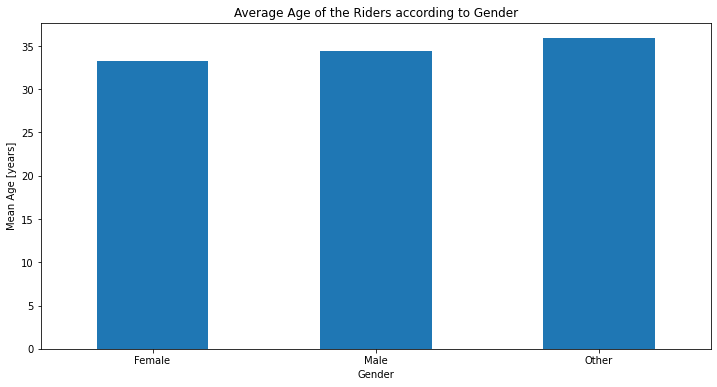

In [41]:
# Analysis the age group according to gender
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
age_by_gender = df.groupby('member_gender').member_age.mean()
age_by_gender.plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Gender')
plt.ylabel('Mean Age [years]')
plt.title('Average Age of the Riders according to Gender')

### Observation
 - The female and male average ages are below 35 years with the average age of the "other" gender is a little above 35 years

###  The Longest Trips by Gender

member_gender
Female    23.109722
Male      23.485556
Other     22.920000
Name: duration_hour, dtype: float64



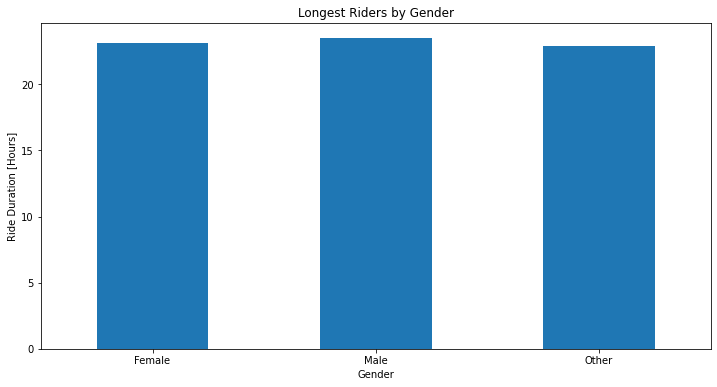

In [42]:
long_trip = df.groupby('member_gender').duration_hour.max()
print(long_trip)
print()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
long_trip.plot(kind='bar', title='Longest Riders by Gender', xlabel='Gender', ylabel='Ride Duration [Hours]')
plt.xticks(rotation=0);

### Observation
The male recorded the longest trip with almost 40 mins time difference from that of the females' longest trip

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- User_type distribution: Most of the users were subscribers with little participation from the customers
- Gender distribution: The rides were dominated, by a wide margin, by the male followed by the female.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- There were no unusual dsitributions. 
- I extracted the start and end day columns from the intial raw information in the start time column so that I can arrive at the day visualizations.

## Bivariate Exploration

### Exploring the relationship between age and trip duration

<Figure size 432x288 with 0 Axes>

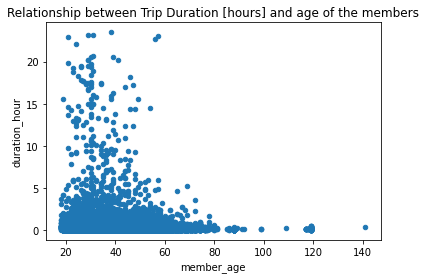

In [66]:
plt.figure()
df.plot(x='member_age', y='duration_hour', kind='scatter');
plt.title('Relationship between Trip Duration [hours] and age of the members');

### Checking the corelation of age and trip duration

In [44]:
df['member_age'].corr(df['duration_hour'])

0.006041174875254648

### Observation
- There is no correlation between the age of the riders and the trips duration

### Which users dominated the ride?

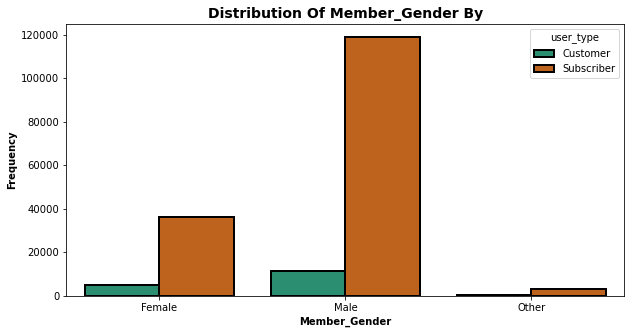

In [45]:
#plt.figure()
#sns.countplot(data=df, x='member_gender', hue='user_type')
#plt.xlabel('Gender of the Users')
#plt.title('Gender Distribution by User types');

count_plot(df, 'member_gender', hue='user_type', palette='Dark2')

### Observation
- For both male and female genders, subscribers dominated the trips more than the customers

### What is the gender distribution on the starting days

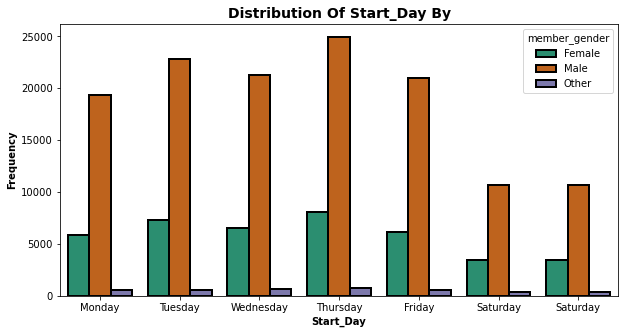

In [46]:
#days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#sns.countplot(data=df, x='start_day', hue='member_gender', order=days)
#plt.xlabel('Trip Start day')
#plt.xticks(rotation=45);


count_plot(df, 'start_day', hue='member_gender', palette='Dark2', order=day_order)

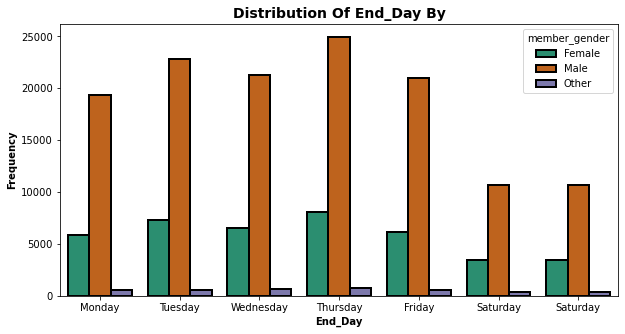

In [47]:
count_plot(df, 'end_day', hue='member_gender', palette='Dark2', order=day_order)

### Observation
- The different genders had more trips on Thursday than other days

Text(0.5, 1.0, 'Age Distribution of gender of the members')

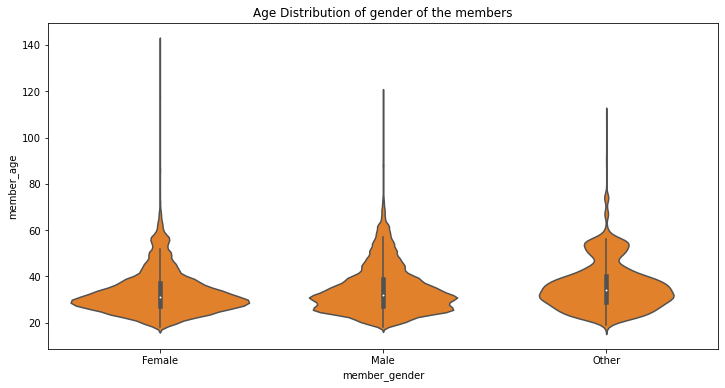

In [64]:
# A Violin plot of Age against Gender

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
base_color = sns.color_palette()[1]
sns.violinplot(data=df, x='member_gender', y='member_age', color=base_color)
plt.title('Age Distribution of gender of the members')

### Observation
- There is a considerable age distribution for the different genders

### Does age have influence on the type of users?

Text(0.5, 1.0, 'Age distribution of the various users')

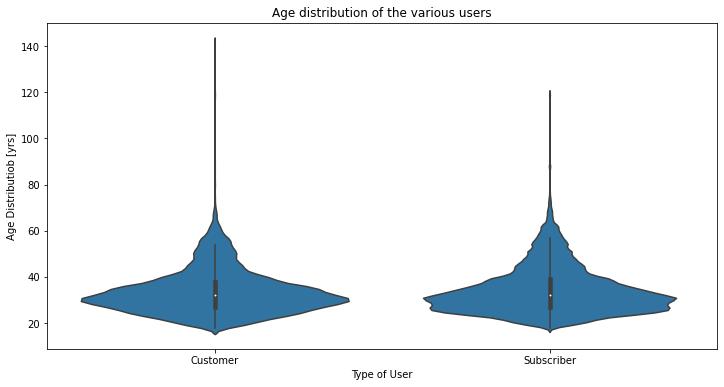

In [63]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
base_color = sns.color_palette()[0]
sns.violinplot(data=df, y='member_age', x='user_type', color=base_color)
plt.ylabel('Age Distributiob [yrs]')
plt.xlabel('Type of User')
plt.title('Age distribution of the various users')

### Observation
- The ages are well distributed across the the different users, around 30 years

In [50]:
list(df.head())

['start_time',
 'end_time',
 'start_station_name',
 'end_station_name',
 'bike_id',
 'user_type',
 'member_birth_year',
 'member_gender',
 'bike_share_for_all_trip',
 'duration_hour',
 'start_date',
 'end_date',
 'member_age',
 'start_day',
 'end_day',
 'starting_time',
 'ending_time']

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

1.  I observed the genders of the users. The male subscribers dominated the trips. Female subscribers were also more than the customers
2.  There is no relationship between member age and trip durations

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

 - There is no interesting relationship between the other festures.

## Multivariate Exploration

### How do the start days have effect on the age of the bikers, while considering gender?

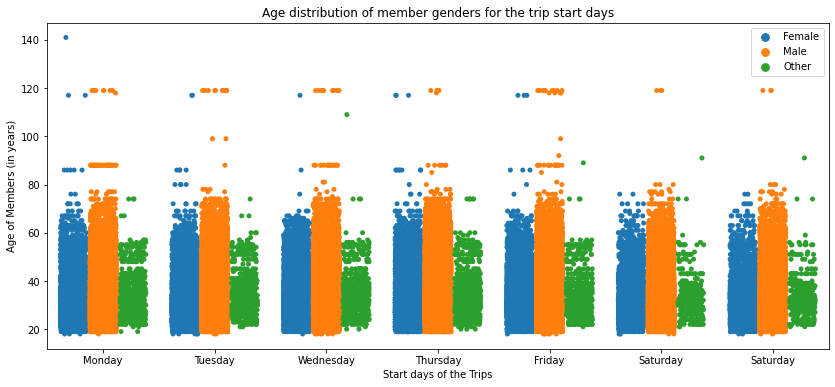

In [62]:
# Create the first axis
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(14, 6))
sns.stripplot(data=df, x='start_day', y='member_age', hue='member_gender', jitter=0.35, dodge=True, order=day_order)
plt.legend(loc=1)
plt.title('Age distribution of member genders for the trip start days')
plt.ylabel('Age of Members (in years)')
plt.xlabel('Start days of the Trips');

Text(0.5, 1.0, 'Age distribution of member genders for the trip end days')

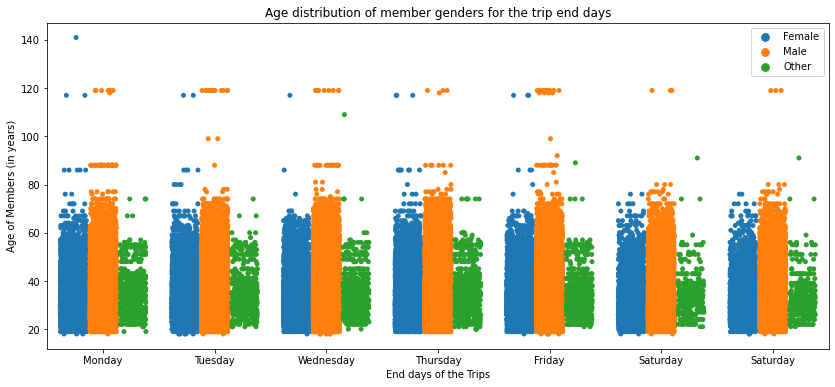

In [60]:
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(14, 6))
sns.stripplot(data=df, x='end_day', y='member_age', hue='member_gender', jitter=0.35, dodge=True, order=day_order)
plt.legend(loc=1)
plt.ylabel('Age of Members (in years)')
plt.xlabel('End days of the Trips');
plt.title('Age distribution of member genders for the trip end days')

### Observation
- There is consistent age distribution of the genders across the different days

### Do the start days have effect on the trip duration for the genders?

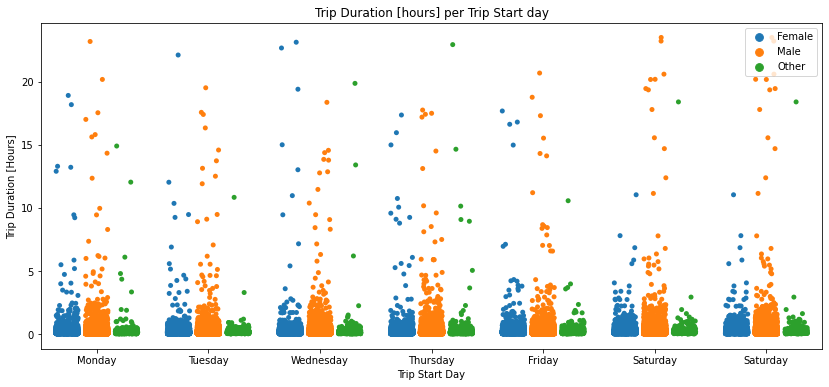

In [58]:
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(14, 6))
sns.stripplot(data=df, x='start_day', y='duration_hour', hue='member_gender', jitter=0.3, dodge=True, order=day_order)
plt.ylabel('Trip Duration [Hours]')
plt.xlabel('Trip Start Day');
plt.title('Trip Duration [hours] per Trip Start day')
plt.legend(loc=1)

### Observation
- The males had longer time duration during the trips
- The "other" gender had the least time duration

### Do the End days have effect on the trip duration for the genders?

Text(0.5, 1.0, 'Effect of Trip End day on Trip duration with respect to the gender ')

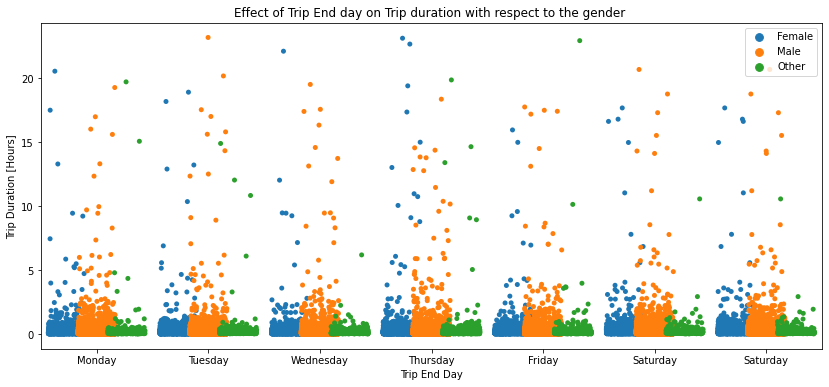

In [70]:
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(14, 6))
sns.stripplot(data=df, x='end_day', y='duration_hour', hue='member_gender', jitter=0.5, dodge=True, order=day_order)
plt.ylabel('Trip Duration [Hours]')
plt.xlabel('Trip End Day');
plt.legend(loc=1)
plt.title('Effect of Trip End day on Trip duration with respect to the gender ')

### Observation
The males had more of the rides throughout the trips

### How does the Start day affect the trip duration with respect to User type?

Text(0.5, 1.0, 'Effect of Trip Start day on Trip duration by the Users ')

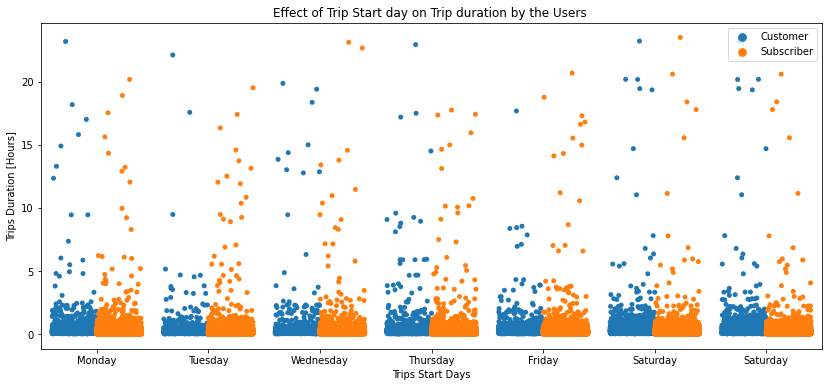

In [69]:
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(14, 6))
sns.stripplot(data=df, x='start_day', y='duration_hour', hue='user_type', jitter=0.4, dodge=True, order=day_order)
plt.ylabel('Trips Duration [Hours]')
plt.xlabel('Trips Start Days')
plt.legend(loc=1)
plt.title('Effect of Trip Start day on Trip duration by the Users ')

### How does the End day affect the trip duration with respect to User type?

Text(0.5, 1.0, 'Effect of Trip End day on Trip duration by the Users ')

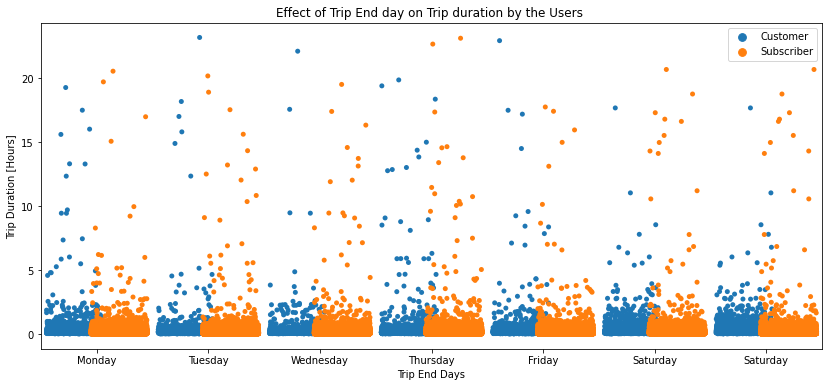

In [68]:
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(14, 6))
sns.stripplot(data=df, x='end_day', y='duration_hour', hue='user_type', jitter=0.5, dodge=True, order=day_order)
plt.ylabel('Trip Duration [Hours]')
plt.xlabel('Trip End Days');
plt.legend(loc=1)
plt.title('Effect of Trip End day on Trip duration by the Users ')

### Observation
- Customers are more active during the weekend than subscribers.
- Implies that customers have more time for trips during weekends, maybe due to work during the week days.

### What is the  age comparison of users according to gender?

Text(0.5, 1.0, 'Age of Users by gender')

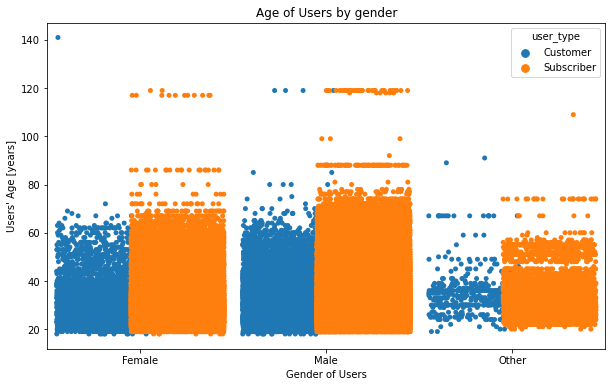

In [67]:
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
sns.stripplot(data=df, x='member_gender', y='member_age', hue='user_type', jitter=0.5, dodge=True)
plt.ylabel("Users' Age [years]")
plt.xlabel('Gender of Users');
plt.title('Age of Users by gender')

### Observation
For the various gender types:
  - The subscribers have higher age distribution than the customers

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

1. The relationship between the duration and start  and end days by the user type suggested that the customers and subscribers  spent lesser time during the same duraton every day. The weekends had more customer engagements/trips

### Were there any interesting or surprising interactions between features?

1. The duration_hour feature interacted well with member_gender feature
2. Start and end days features also interacted well with usefr_type feature

## Conclusions
1. The male gender dominated the rides/trips
2. Subscribers were more involoved in the rides, by a landslide, than the customers
3. The longest trip duration by the male was about 40 mins more than the female trip.
4. Thursdays had more trips than every other day in general.
5. The age of the riders were well distributed across the users. 